## Importamos librerías

In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Función de one-hot encoding

In [ ]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.5217 - acc: 0.7724 - val_loss: 0.3895 - val_acc: 0.8644
Epoch 2/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.3070 - acc: 0.9049 - val_loss: 0.3368 - val_acc: 0.8671
Epoch 3/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.2249 - acc: 0.9279 - val_loss: 0.2869 - val_acc: 0.8848
Epoch 4/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.1782 - acc: 0.9428 - val_loss: 0.2789 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.1449 - acc: 0.9542 - val_loss: 0.2797 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.1198 - acc: 0.9636 - val_loss: 0.3041 - val_acc: 0.8819
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1002 - acc: 0.9694 - val_loss: 0.3100 - val_a

### Comparando un modelo más pequeño

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.5958 - acc: 0.7417 - val_loss: 0.5195 - val_acc: 0.8297
Epoch 2/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.4497 - acc: 0.8763 - val_loss: 0.4238 - val_acc: 0.8629
Epoch 3/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.3521 - acc: 0.9079 - val_loss: 0.3571 - val_acc: 0.8842
Epoch 4/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.2876 - acc: 0.9227 - val_loss: 0.3204 - val_acc: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2410 - acc: 0.9342 - val_loss: 0.2999 - val_acc: 0.8881
Epoch 6/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2073 - acc: 0.9418 - val_loss: 0.2873 - val_acc: 0.8870
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1804 - acc: 0.9496 - val_loss: 0.2759 - val_a

## Analizamos resultados

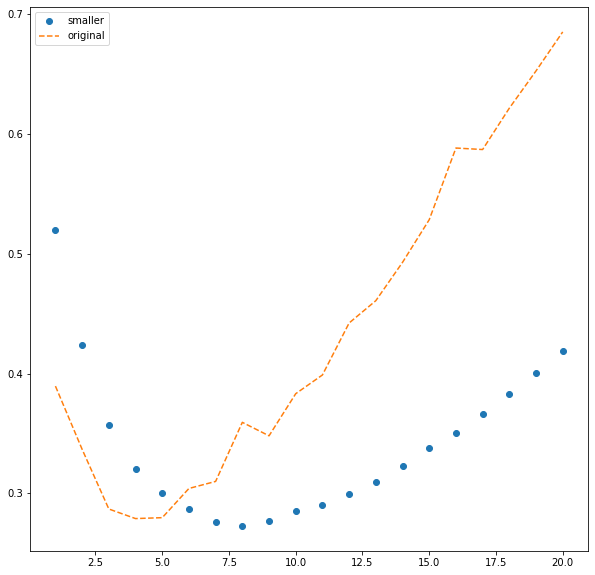

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularización

In [ ]:
from keras import regularizers

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.5388 - acc: 0.7923 - val_loss: 0.4269 - val_acc: 0.8490
Epoch 2/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.3382 - acc: 0.9037 - val_loss: 0.3497 - val_acc: 0.8808
Epoch 3/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.2734 - acc: 0.9243 - val_loss: 0.3281 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.2403 - acc: 0.9360 - val_loss: 0.3257 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2191 - acc: 0.9458 - val_loss: 0.3303 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2040 - acc: 0.9519 - val_loss: 0.3368 - val_acc: 0.8861
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1955 - acc: 0.9553 - val_loss: 0.3442 - val_a

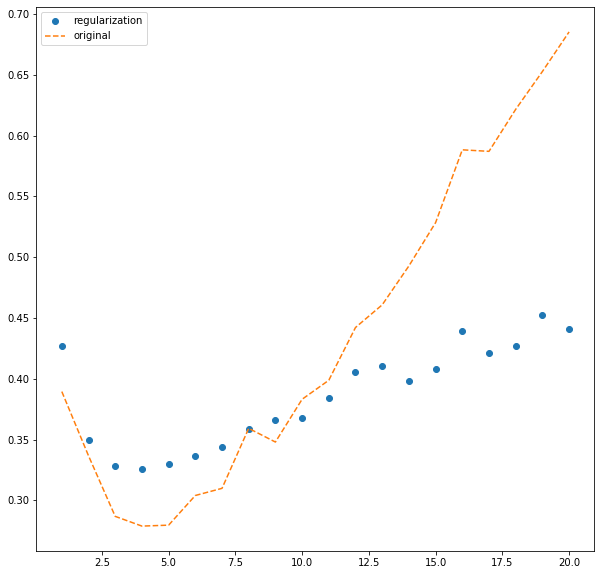

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 48us/step - loss: 0.6559 - acc: 0.6078 - val_loss: 0.5652 - val_acc: 0.8302
Epoch 2/20
15000/15000 [==============================] - 1s 40us/step - loss: 0.5480 - acc: 0.7465 - val_loss: 0.4524 - val_acc: 0.8439
Epoch 3/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.4585 - acc: 0.8131 - val_loss: 0.3734 - val_acc: 0.8748
Epoch 4/20
15000/15000 [==============================] - 1s 38us/step - loss: 0.3984 - acc: 0.8499 - val_loss: 0.3319 - val_acc: 0.8802
Epoch 5/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.3383 - acc: 0.8821 - val_loss: 0.2985 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.2968 - acc: 0.9041 - val_loss: 0.3094 - val_acc: 0.8806
Epoch 7/20
15000/15000 [==============================] - 1s 39us/step - loss: 0.2596 - acc: 0.9161 - val_loss: 0.2928 - val_acc

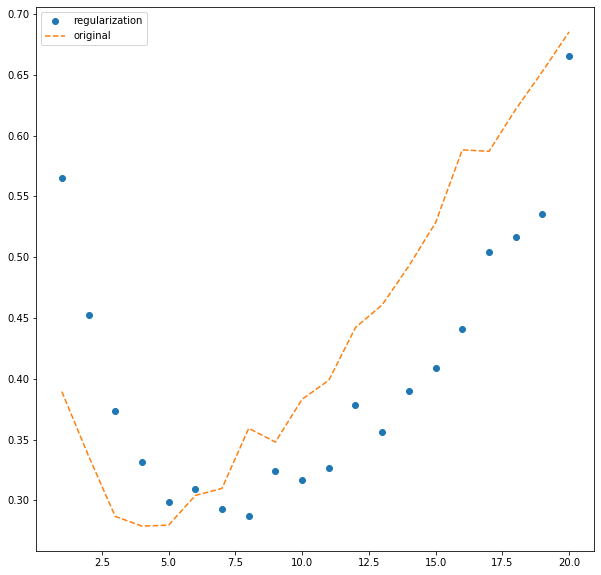

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()